In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [31]:
data = pd.read_csv("penguins.csv")

In [32]:
data.head(3)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [46]:
data.species.unique()

array([0, 2, 1])

In [33]:
data.isna().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [34]:
data.drop(["Unnamed: 0","year"],axis=1,inplace=True)

In [35]:
le = LabelEncoder()
data.species = le.fit_transform(data.species)
data.island = le.fit_transform(data.island)
data.sex = le.fit_transform(data.sex)

In [36]:
data.dropna(inplace=True)

In [37]:
X = data.drop("species", axis=1)
y = data.species

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [41]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [42]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_poly.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_poly, y_train_encoded, epochs=150, batch_size=32, validation_data=(X_test_poly, y_test_encoded))


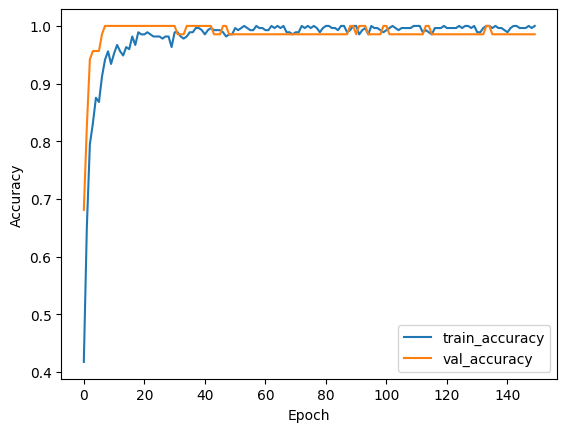

In [44]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [45]:
loss, accuracy = model.evaluate(X_test_poly, y_test_encoded)
print("Test seti doğruluk değeri:", accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 0.0511 - accuracy: 0.9855
Test seti doğruluk değeri: 0.9855072498321533
